# Лабораторная работа №1. 
## Синтез и фильтрация шумоподобных сигналов. М-последовательности. Коды Уолша-Адамара
                                                                                                    
Выполнил студент ИВТ-31: Петров Д.

### Основное задание

#### Синтез и фильтрация М-последовательностей

##### 1. Сформировать две М-последовательности $M_1$ и $M_2$

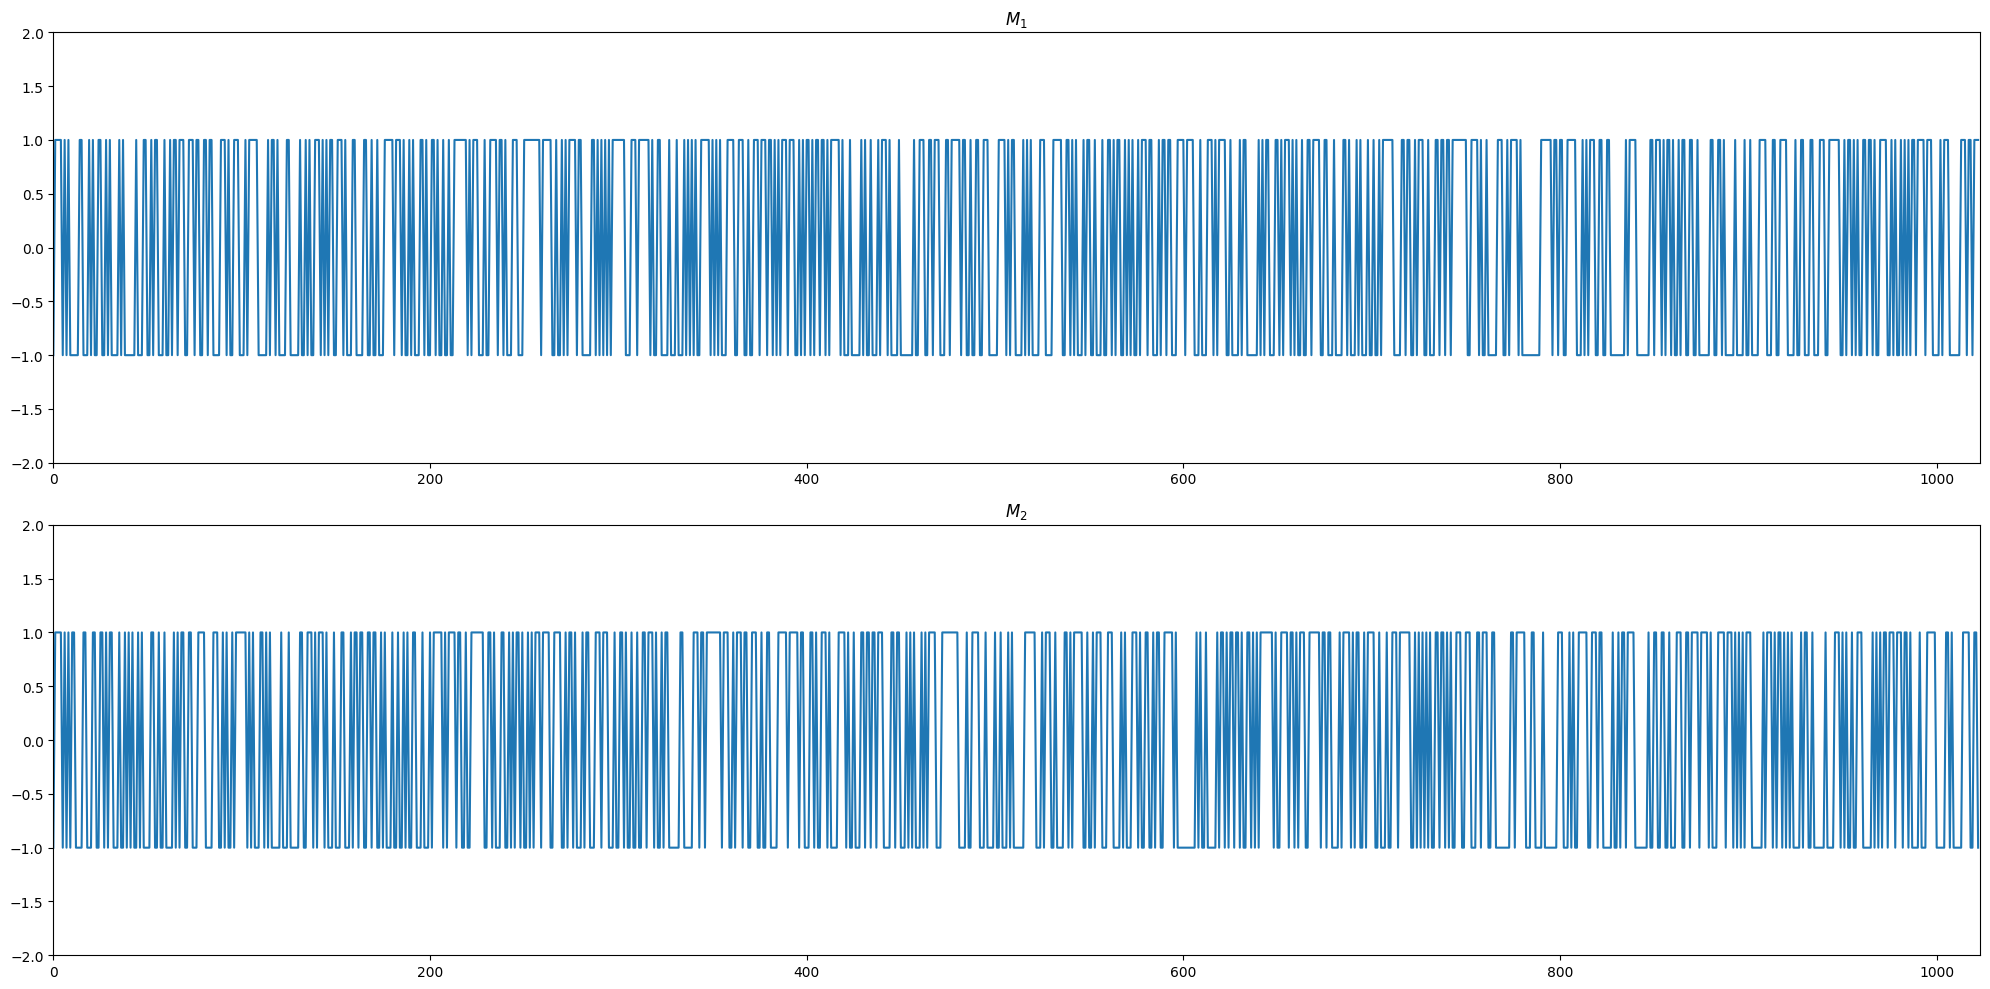

In [97]:
import matplotlib.pyplot as     plt
import numpy             as     np
from   scipy.signal      import max_len_seq

M1 = np.array( max_len_seq( nbits=10, taps=[1, 3, 4], state=[1, 0, 0, 0, 0, 1, 0, 1, 0, 1] )[0], dtype=int )
M2 = np.array( max_len_seq( nbits=10, taps=[1, 3, 4, 6, 9], state=[1, 0, 0, 0, 0, 1, 0, 1, 0, 1] )[0], dtype=int)

M1 = M1 * (-2) + 1
M2 = M2 * (-2) + 1

fig, ( ax1, ax2 ) = plt.subplots( nrows=2, ncols=1 )
fig.set( figheight=10, figwidth=20 )

ax1.set_title( '$M_{1}$' )
ax1.set( xlim=( 0, 1023 ), ylim=( -2, 2 ) ) 
ax1.plot( M1 )
ax2.set_title( '$M_{2}$' )
ax2.set( xlim=( 0, 1023 ), ylim=( -2, 2 ) )
ax2.plot( M2 )

plt.tight_layout()
plt.show()

##### 2. Сформировать сумму M-последовательностей $M_{sum} = M_1 + M_2$

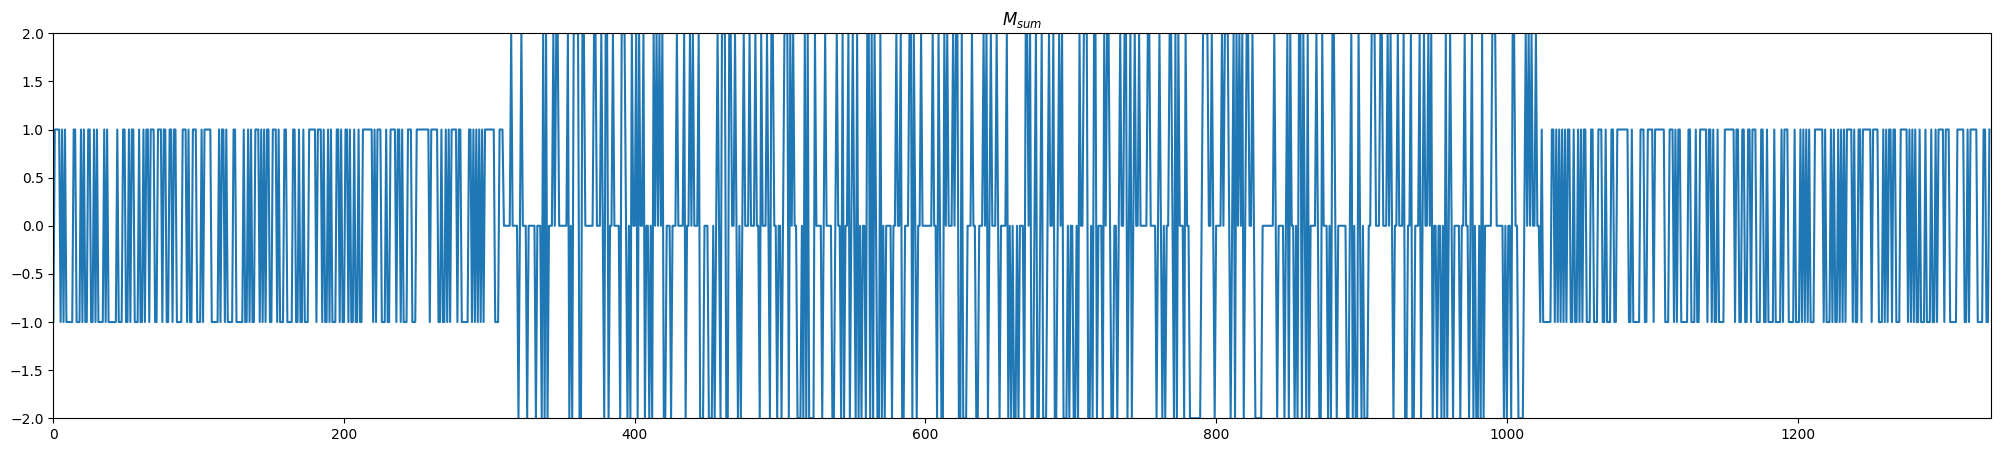

In [98]:
M_sum = np.concatenate( ( M1, np.zeros( 310 ) ), axis=None ) + np.concatenate( ( np.zeros( 310 ), -M2 ) , axis=None )

plt.figure( figsize=( 25, 5 ) )
plt.title( '$M_{sum}$' )
plt.plot( M_sum )
plt.axis( ( 0, 1333, -2, 2 ) )
plt.show()

##### 3. Построить АКФ для $M_1$

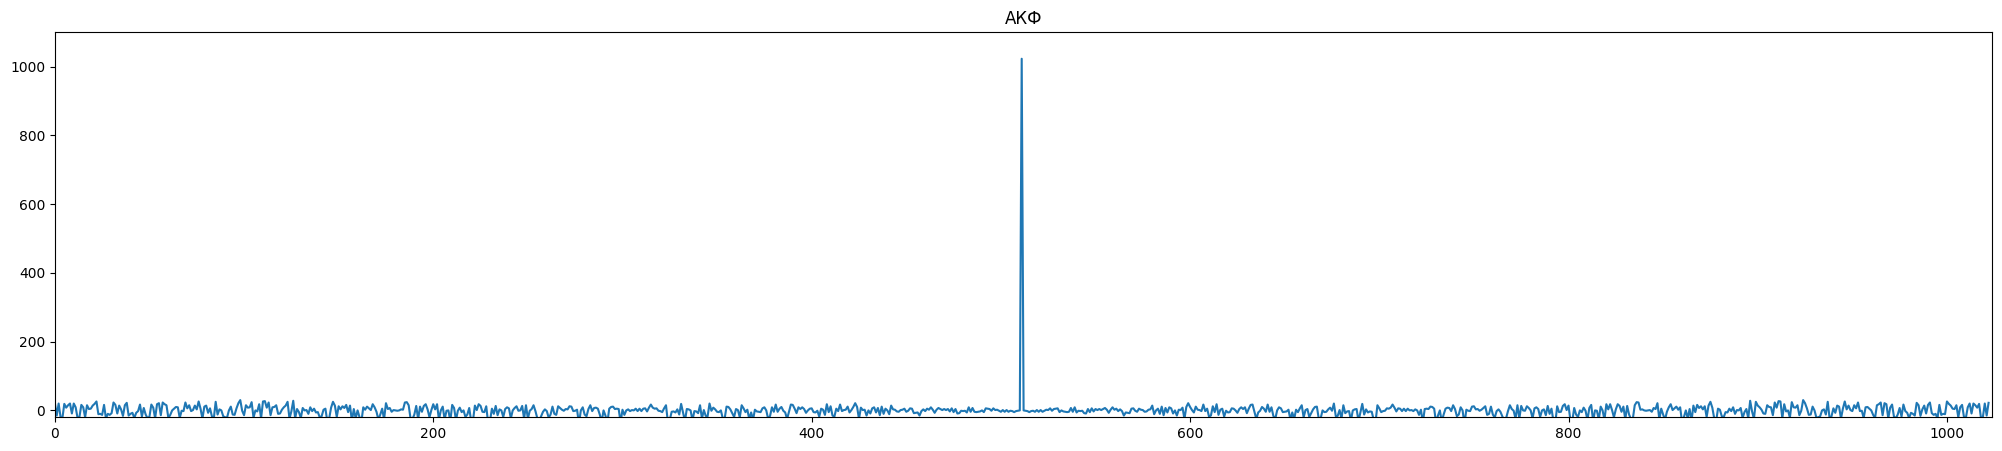

In [99]:
AKF = np.correlate( M1, M1, "same" )

plt.figure( figsize=( 25, 5 ) )
plt.title( 'АКФ' )
plt.plot( AKF )
plt.axis( ( 0, 1024,-20, 1100 ) )
plt.show()

##### 4. Построить ВКФ

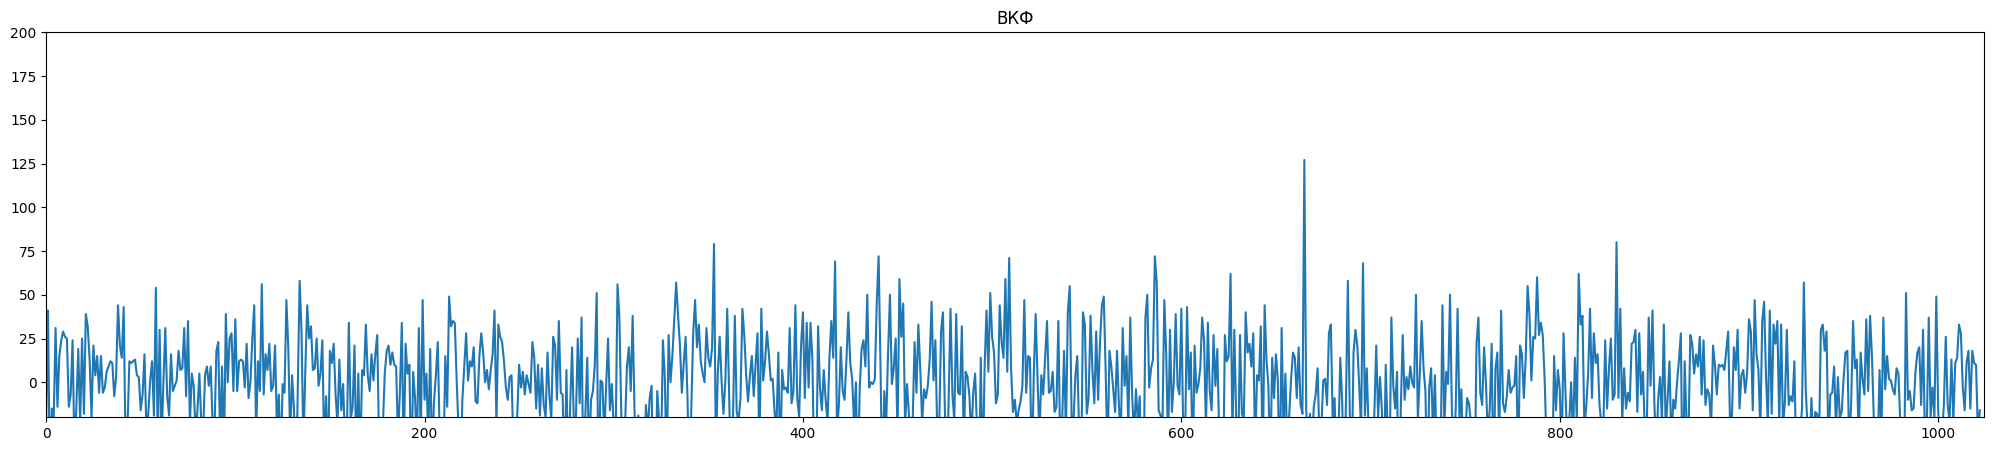

In [100]:
BKF = np.correlate( M1, M2, "same" )

plt.figure( figsize=( 25, 5 ) )
plt.title( 'ВКФ' )
plt.plot( BKF )
plt.axis( ( 0, 1024,-20, 200 ) )
plt.show()

##### 5. Из $M_{sum}$ отфильтровать $M_1$

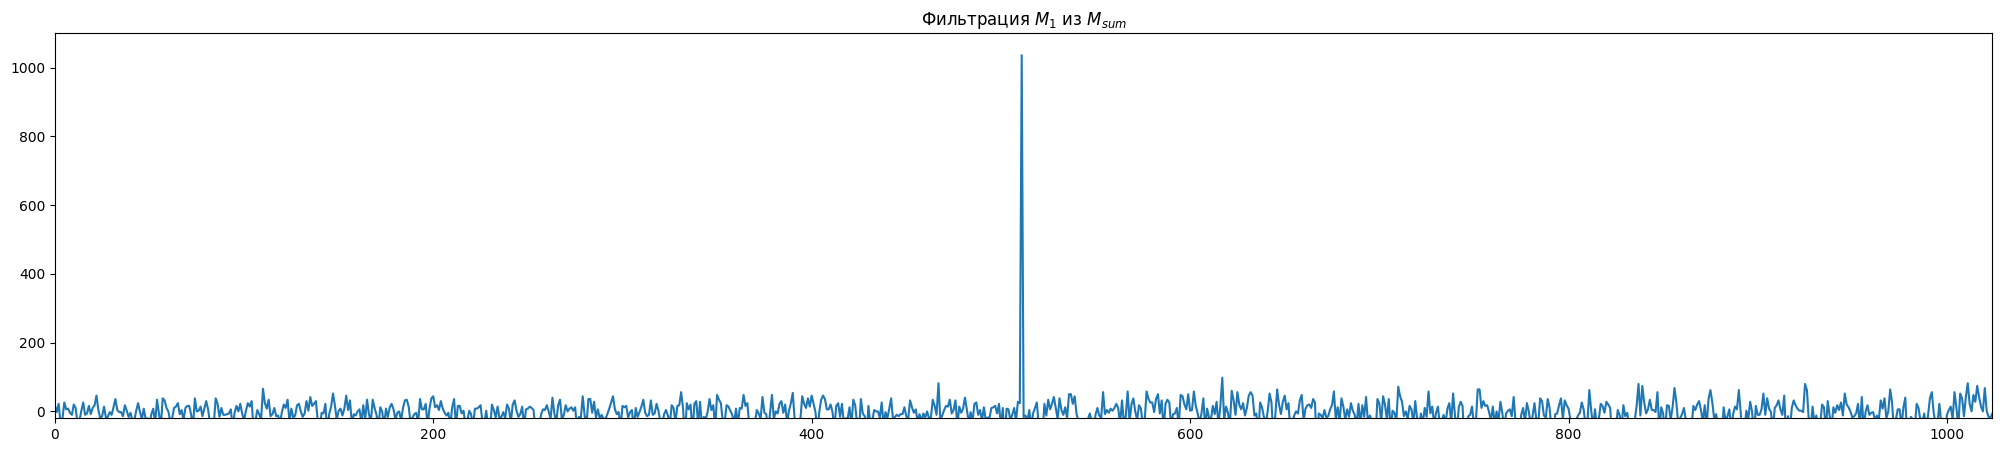

In [101]:
fil_1 = np.correlate( M_sum, M1, "same" )

plt.figure( figsize=( 25, 5 ) )
plt.title( 'Фильтрация $M_{1}$ из $M_{sum}$' )
plt.plot( fil_1 )
plt.axis( ( 0, 1024,-20, 1100 ) )
plt.show()

##### 6. Из $M_{sum}$ отфильтровать $M_2$

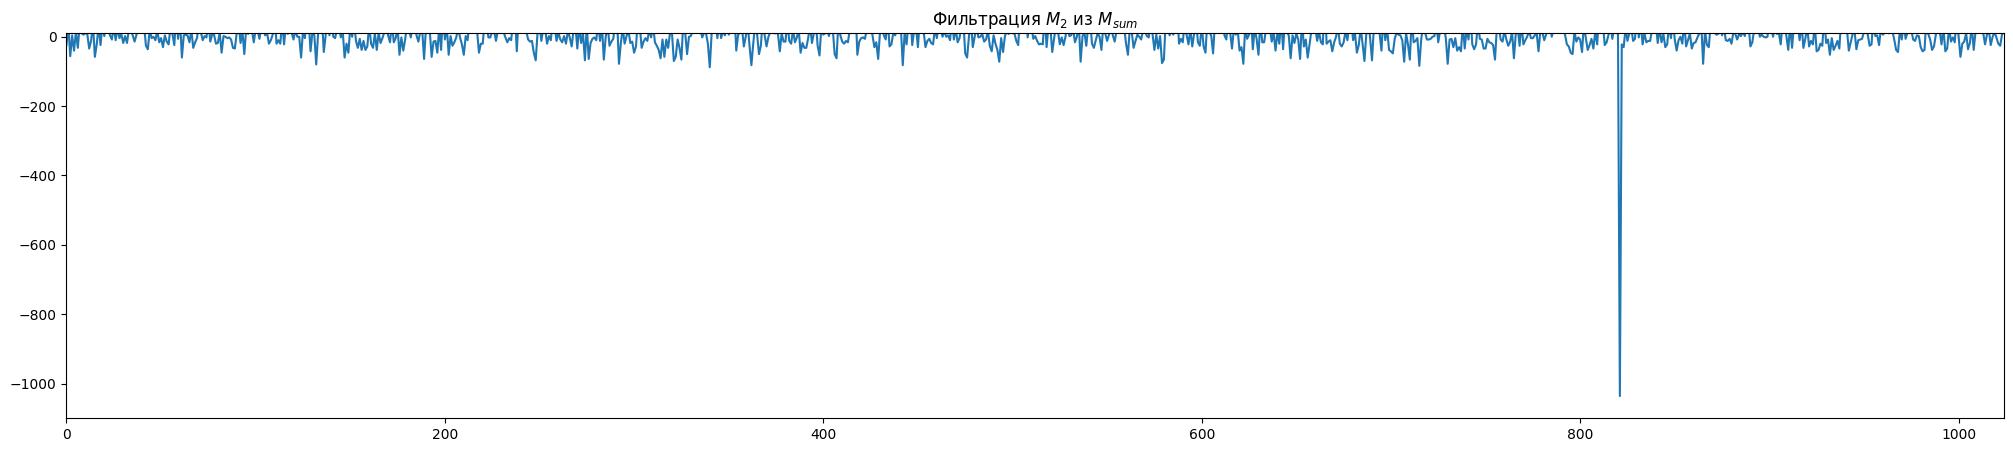

In [102]:
fil_2 = np.correlate( M_sum, M2, "same" )

plt.figure( figsize=( 25, 5 ) )
plt.title( 'Фильтрация $M_{2}$ из $M_{sum}$' )
plt.plot( fil_2 )
plt.axis( ( 0, 1024,-1100, 10 ) )
plt.show()

##### 7. Сформировать последовательность $M_3$, добавив к $M_1$ шум

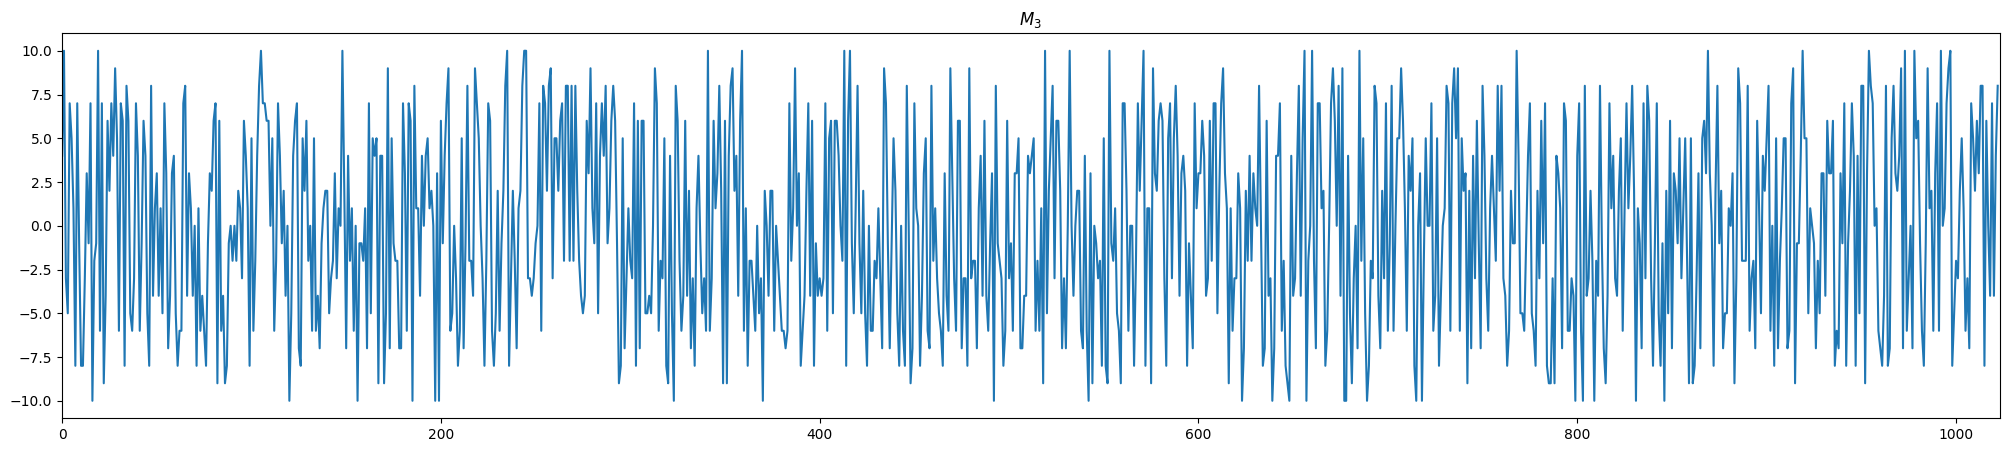

In [103]:
rng   = np.random.default_rng( 10 )
noize = np.array( rng.integers( low=-9, high=10, size=1023 ) )
M3 = M1 + noize
plt.figure( figsize=( 25, 5 ) )
plt.title( '$M_3$' )
plt.plot( M3 )
plt.axis( ( 0, 1023, -11, 11 ) )
plt.show()

##### 8. Из $M_3$ отфильтровать $M_1$

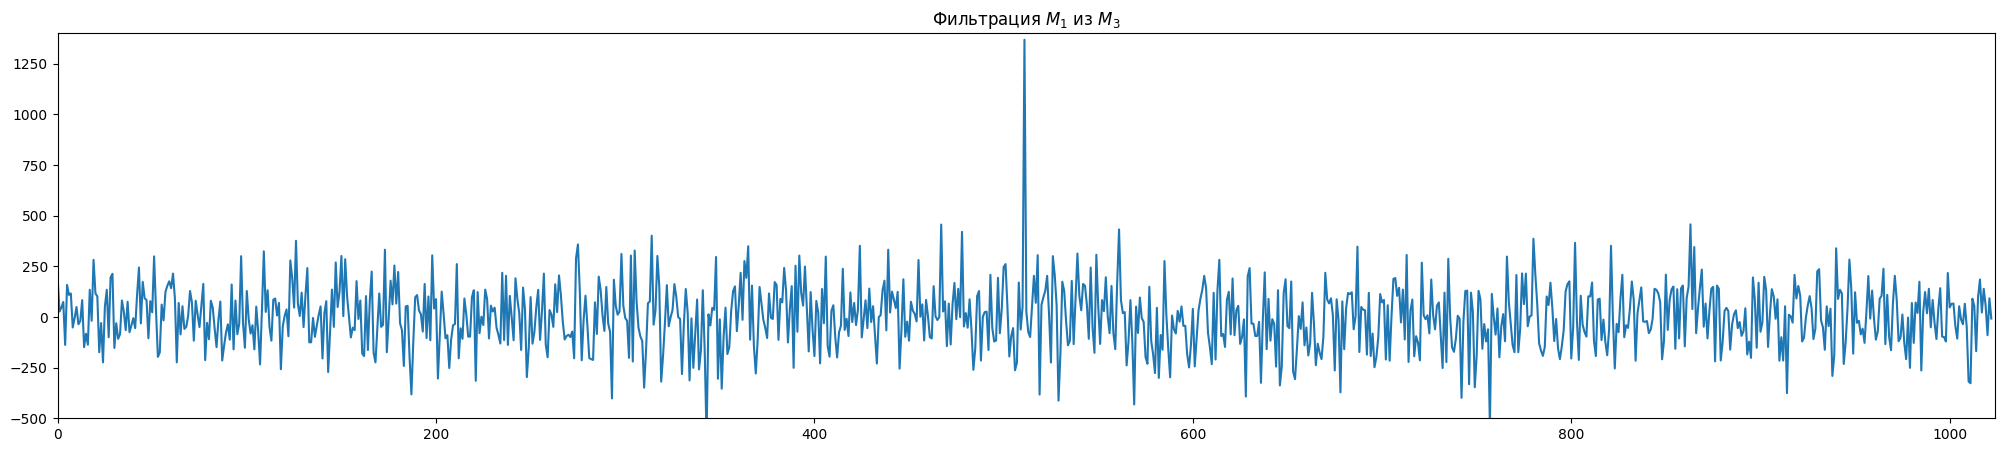

In [104]:
M3_fl = np.correlate( M3, M1, "same" )
plt.figure( figsize=( 25, 5 ) )
plt.title( 'Фильтрация $M_1$ из $M_3$' )
plt.plot( M3_fl )
plt.axis( ( 0, 1024,-500, 1400 ) )
plt.show()

Максимальная амплитуда шума = 1368


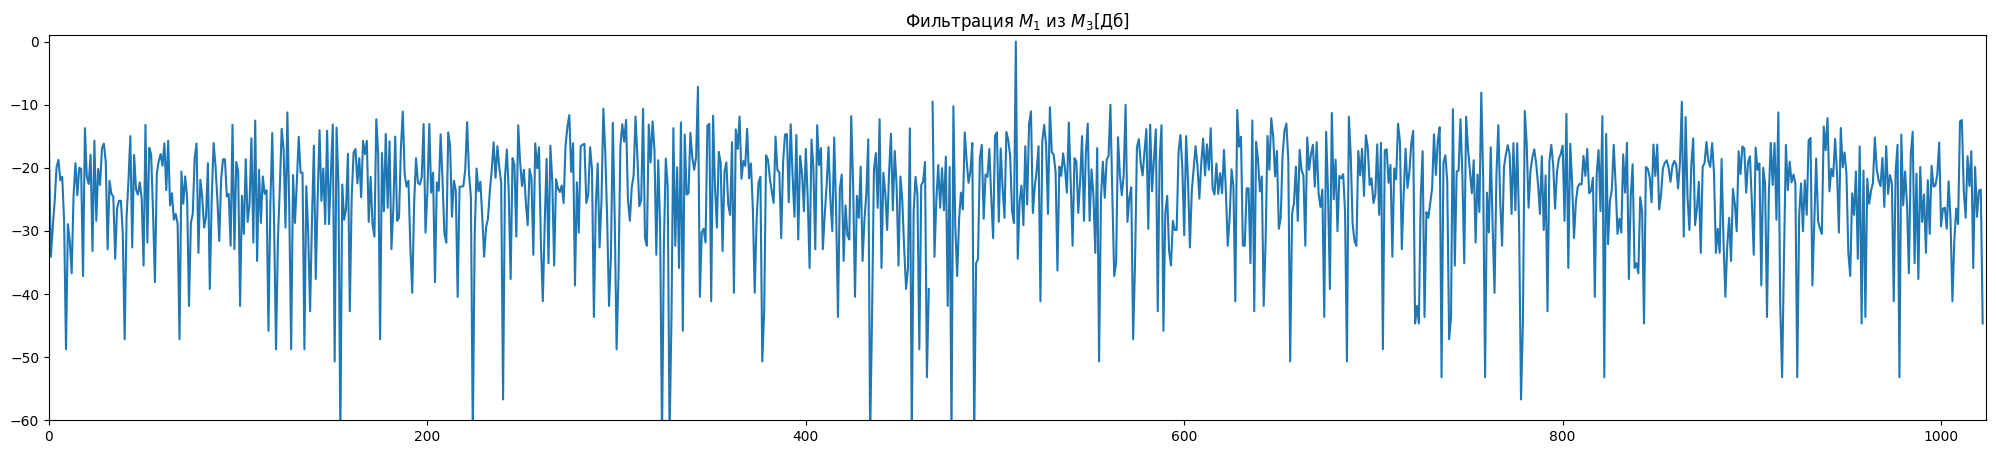

In [105]:
print( 'Максимальная амплитуда шума =', max( M3_fl ) )

Adb = 20 * np.log10( abs( M3_fl / max( M3_fl ) ) )

plt.figure ( figsize=( 25, 5 ) )
plt.title( 'Фильтрация $M_1$ из $M_3$[Дб]' )
plt.plot( Adb )
plt.axis( ( 0, 1024, -60, 1 ) )
plt.show()

#### Синтез и фильтрация кодов Уолша-Адамара

##### 1. Сформировать два кода $W_1$ и $W_2$ при помощи матрицы Адамара

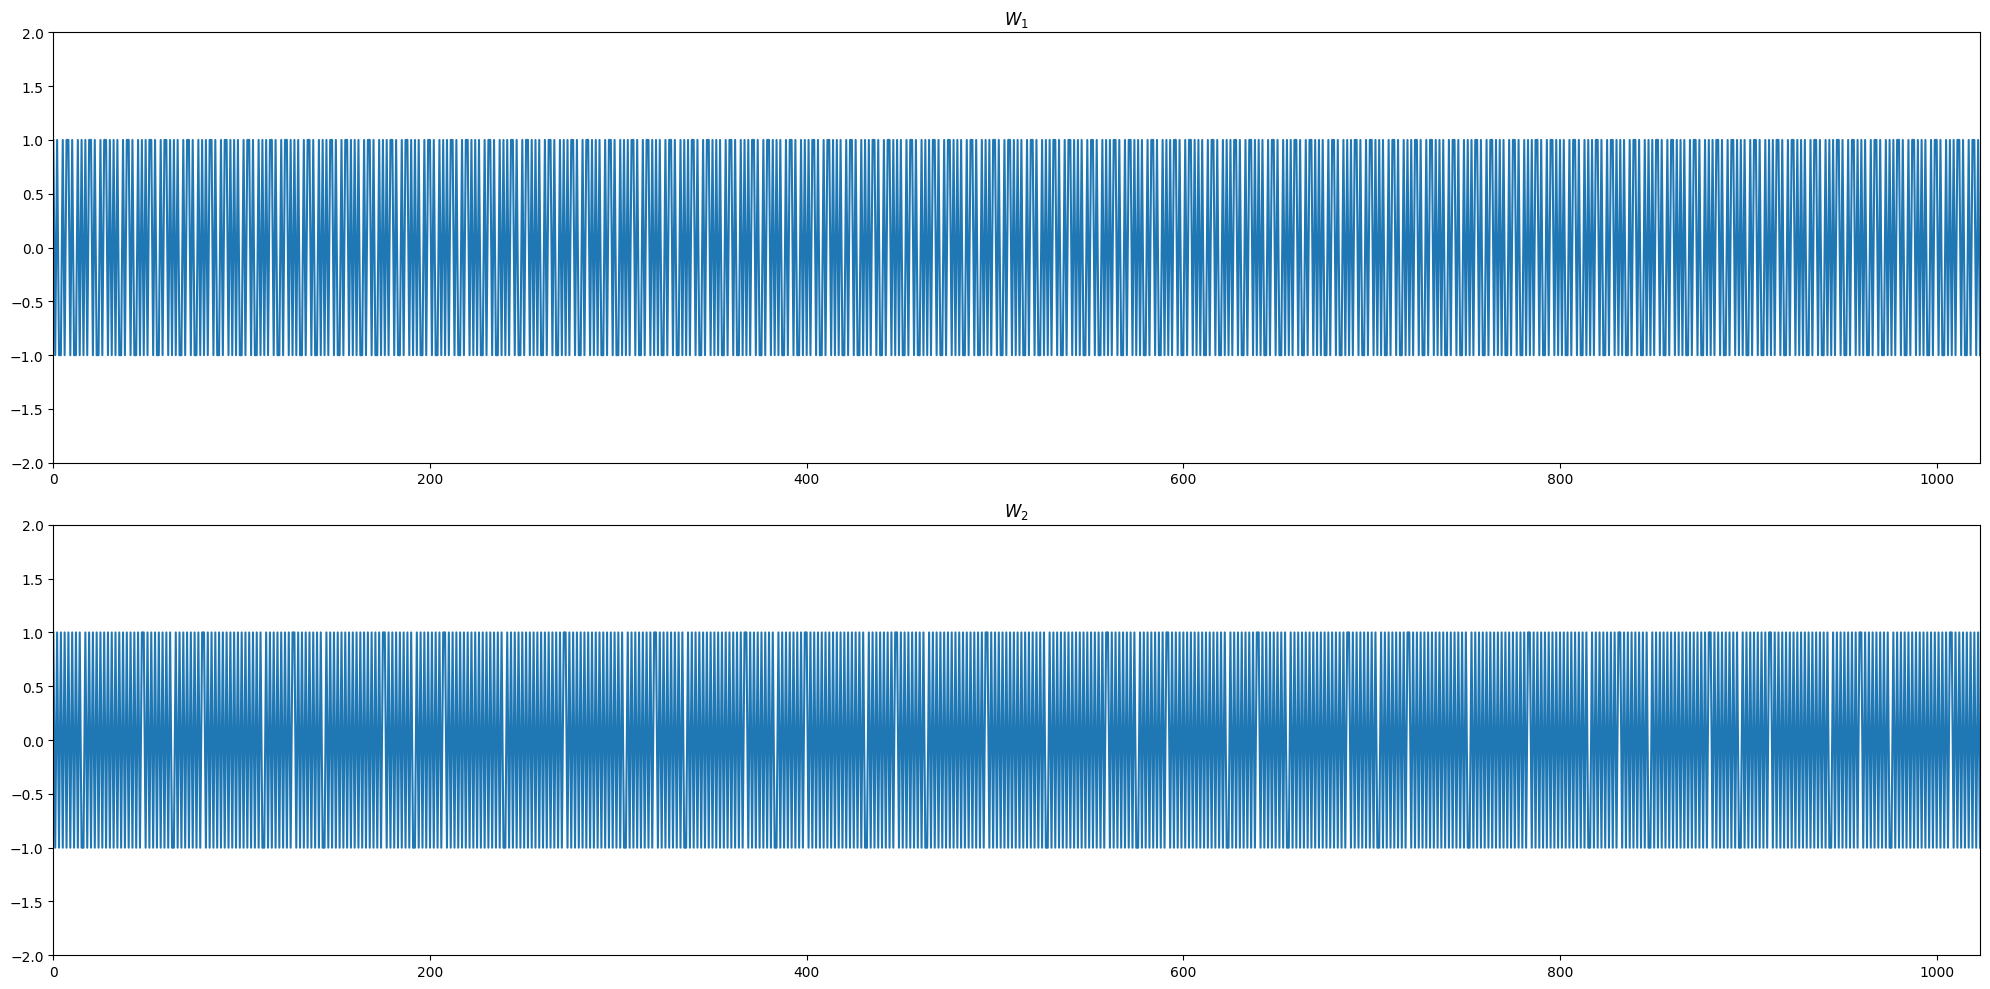

In [106]:
from scipy.linalg import hadamard
from sympy        import fwht, ifwht

Adamar_matrix = hadamard( 2**10, dtype=int ) 

W1 = Adamar_matrix[21]
W2 = Adamar_matrix[369]

fig, ( ax1, ax2 ) = plt.subplots( nrows=2, ncols=1 )
fig.set( figheight=10, figwidth=20 )

ax1.set_title('$W_1$')
ax1.set( xlim=( 0, 1023 ), ylim=( -2, 2 ) ) 
ax1.plot( W1 )
ax2.set_title( '$W_2$' )
ax2.set( xlim=( 0, 1023 ), ylim=( -2, 2 ) )
ax2.plot( W2 )

plt.tight_layout()
plt.show()

##### 2. Сформировать сумму кодов $W_{sum} = W_1 + W_2$

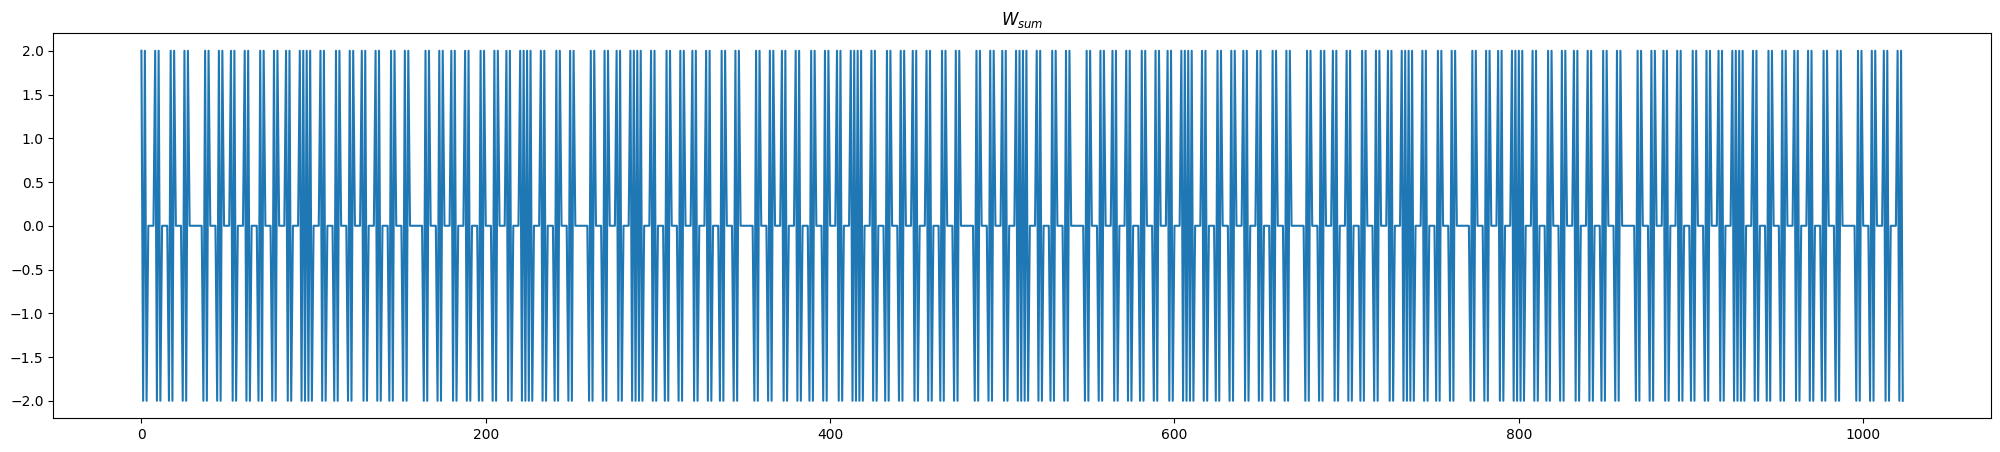

In [107]:
Wsum = W1 + W2
plt.figure( figsize=( 25, 5 ) )
plt.title( '$W_{sum}$' )
plt.plot( Wsum )
plt.show()

##### 3. Вычислить БПУА для суммы кодов $W_3$

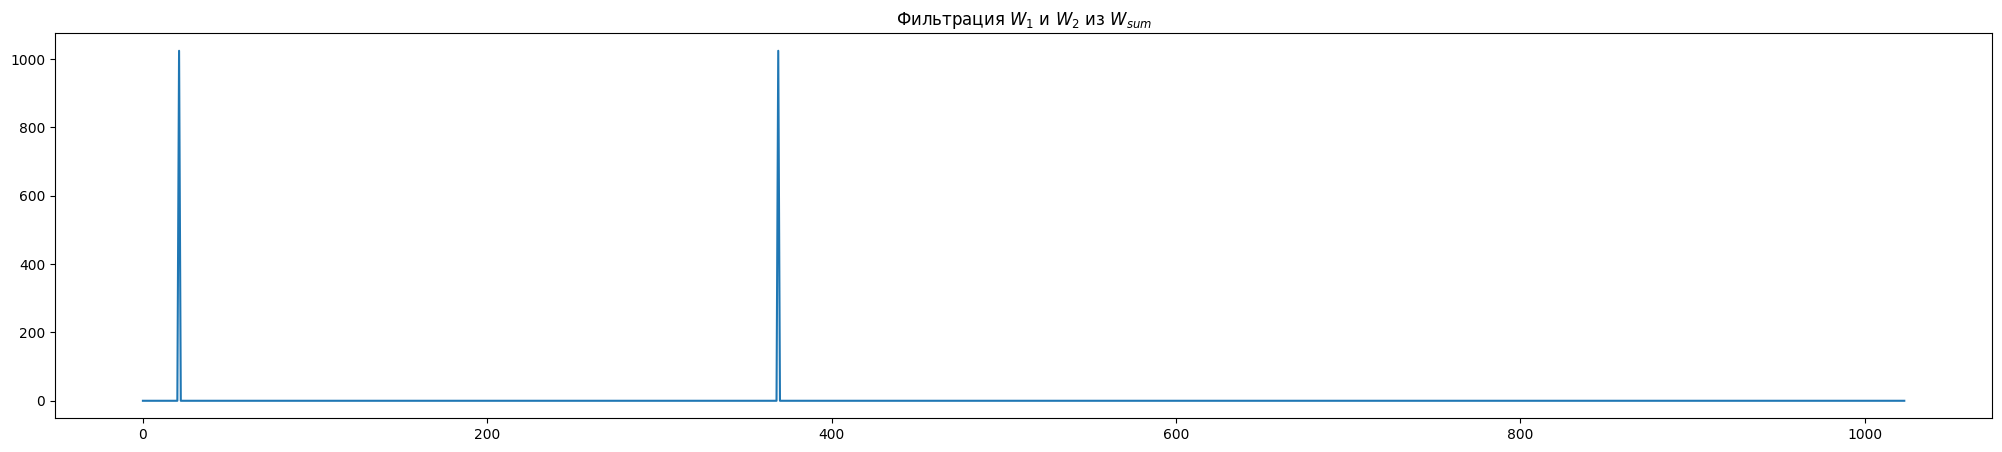

In [108]:
BPUA = fwht( Wsum )
plt.figure( figsize=( 25, 5 ) )
plt.title( 'Фильтрация $W_1$ и $W_2$ из $W_{sum}$' )
plt.plot( BPUA )
plt.show()

##### 4. Сформировать $W_3$

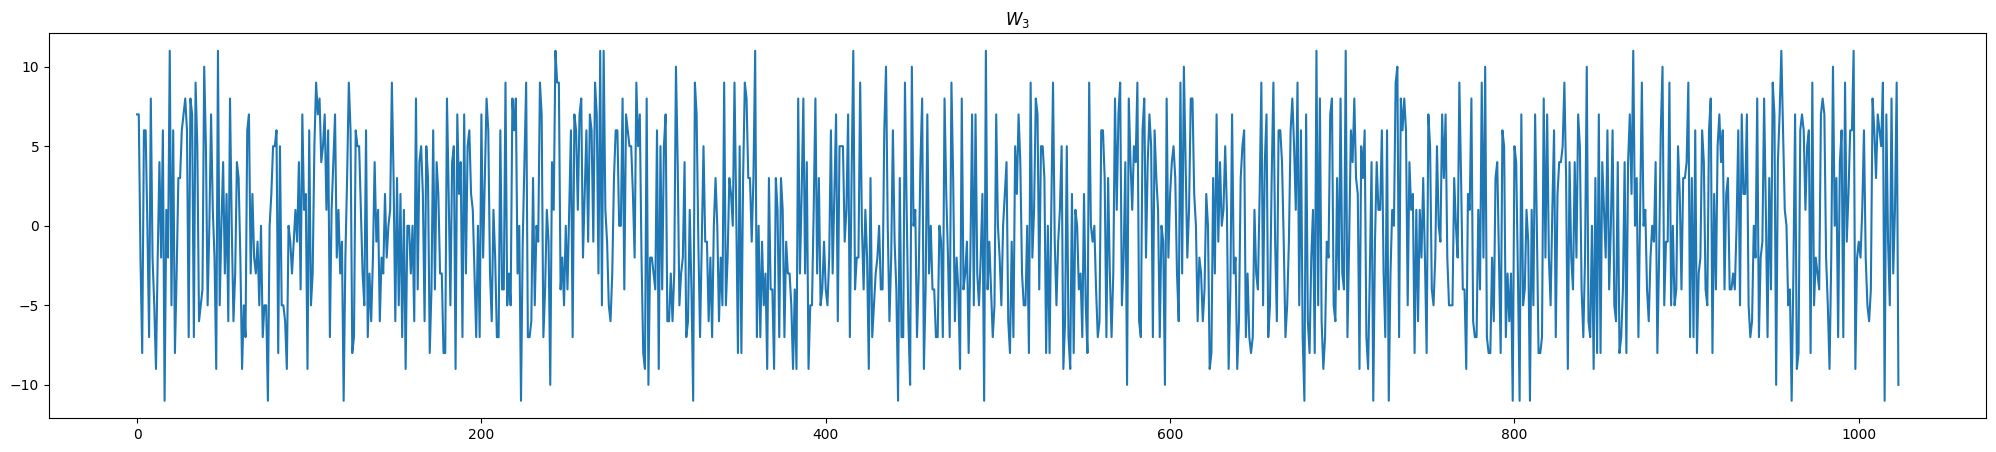

In [109]:
rng   = np.random.default_rng( 10 )
noize = np.array( rng.integers( low=-9, high=10, size=1024 ) )
W3 = Wsum + noize
plt.figure( figsize=( 25, 5 ) )
plt.title( '$W_3$' )
plt.plot( W3 )
plt.show()

##### 5. Вычислить БПУА для $W_3$

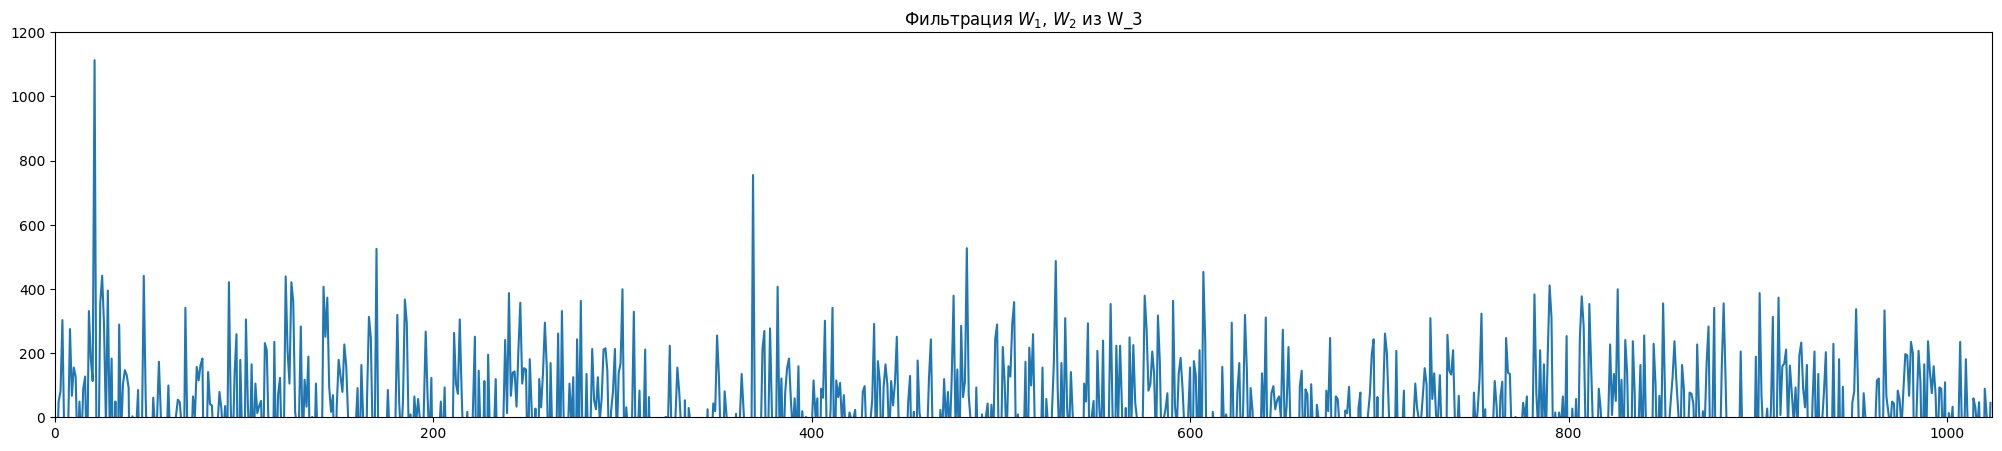

In [110]:
BPUA = np.asarray( fwht( W3 ), dtype=int )
plt.figure( figsize=( 25,5 ) )
plt.title( 'Фильтрация $W_1$, $W_2$ из W_3' )
plt.axis( ( 0, 1024, 0, 1200 ) )
plt.plot( BPUA )
plt.show()

Максимальная амплитуда шума = 1113


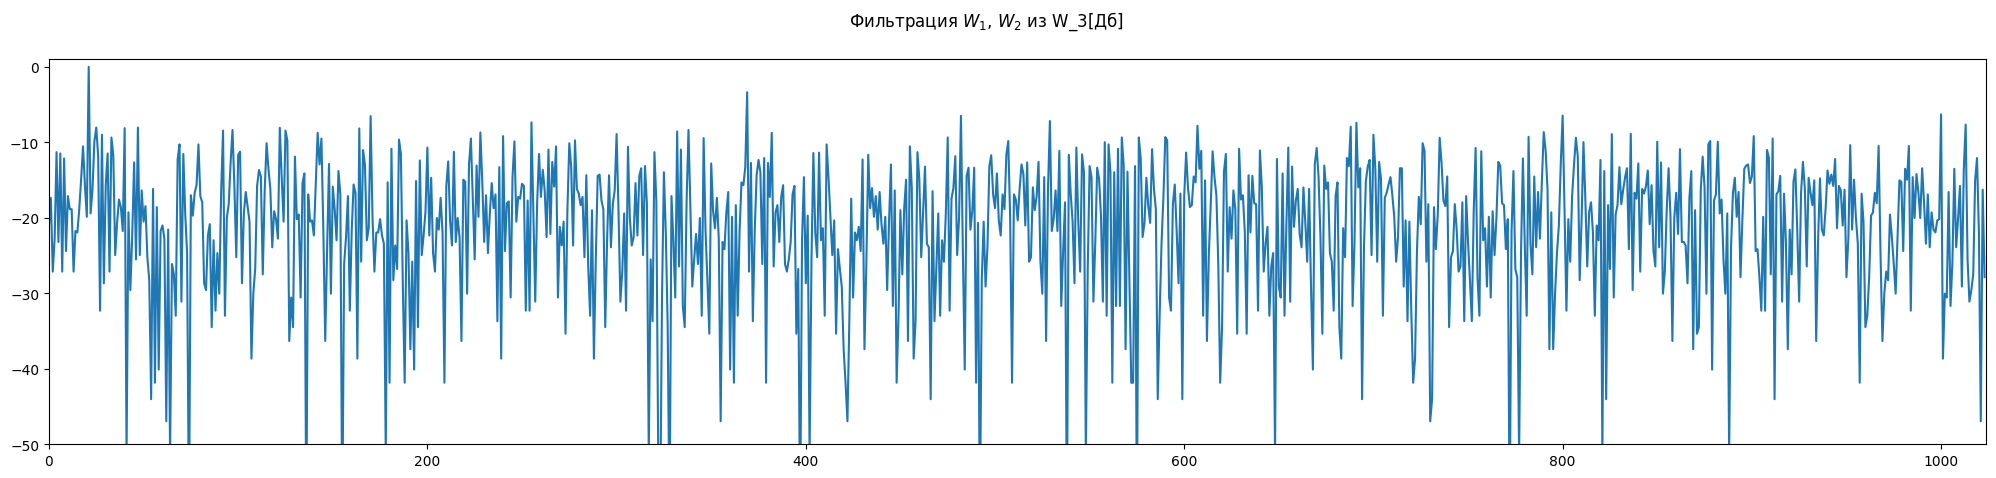

In [111]:
print( 'Максимальная амплитуда шума =', max( BPUA ) )

Adb = 20 * np.log10( abs( BPUA / max( BPUA ) ) )

plt.figure ( figsize=( 25, 5 ) )
plt.suptitle( 'Фильтрация $W_1$, $W_2$ из W_3[Дб]' )
plt.plot( Adb )
plt.axis( ( 0, 1024, -50, 1 ) )
plt.show()